In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0,8.0)

tc = pd.read_csv('TeamConferences.csv')
ctg = pd.read_csv('ConferenceTourneyGames.csv')
teams = pd.read_csv('Teams.csv')
rscr = pd.read_csv('RegularSeasonCompactResults.csv')
rsdr = pd.read_csv('RegularSeasonDetailedResults.csv')
ntcr = pd.read_csv('NCAATourneyCompactResults.csv')
ts = pd.read_csv('NCAATourneySeeds.csv')
tss = pd.read_csv('NCAATourneySlots.csv')
ctg = pd.read_csv('ConferenceTourneyGames.csv')

In [33]:
rsdr

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
7,2003,12,1186,75,1457,61,N,0,28,62,...,17,17,23,8,25,10,15,14,8,18
8,2003,12,1194,71,1156,66,N,0,28,58,...,18,12,27,13,26,13,25,8,2,18
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18


## Data Exploration

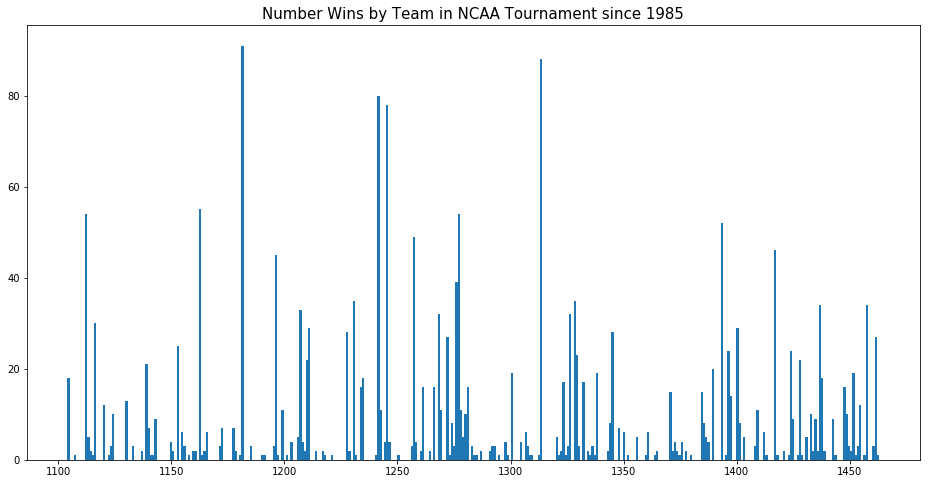

In [5]:
plt.hist(ntcr['WTeamID'],bins=364)
plt.title("Number Wins by Team in NCAA Tournament since 1985",size=15)
plt.show()

In [6]:
tourney_wins_by_team = pd.Series(ntcr['WTeamID']).value_counts(normalize=False,sort=True,ascending=False)
# print(tourney_wins_by_team)
new_index = np.arange(1101,1465)
tourney_wins_by_team = pd.Series(tourney_wins_by_team).reindex(new_index)
tourney_wins_by_team.fillna(0,inplace=True)

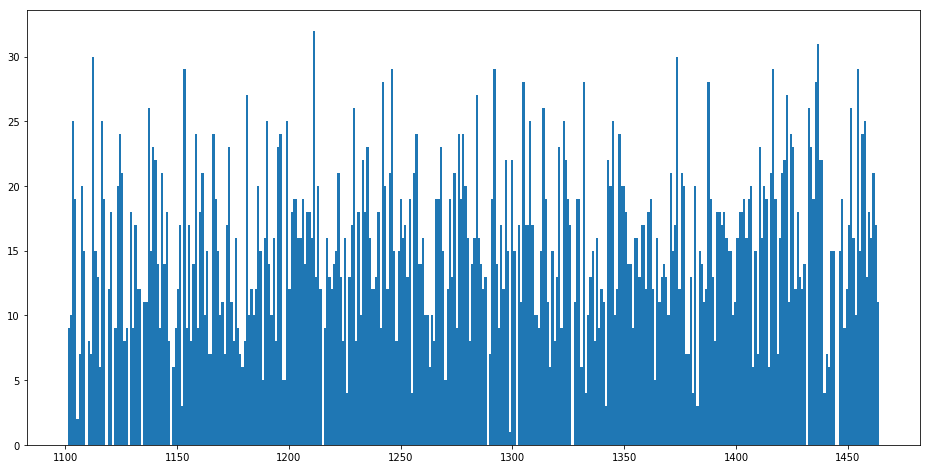

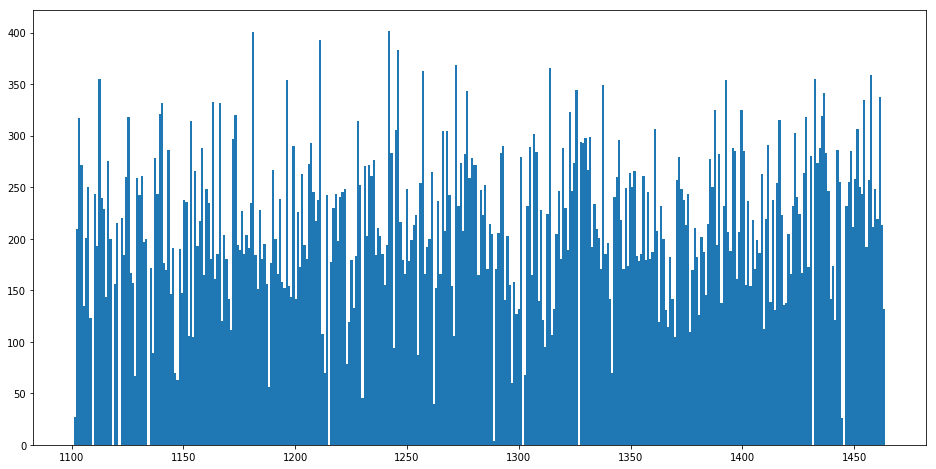

In [7]:
current_rsdr = rsdr[rsdr['Season'] == 2017]
season_wins_by_team = pd.Series(current_rsdr['WTeamID']).value_counts(normalize=False,sort=True,ascending=False)
plt.hist(current_rsdr['WTeamID'],bins=364)
plt.show()
plt.hist(rsdr['WTeamID'],bins=364)
plt.show()
new_index = np.arange(1101,1465)
season_wins_by_team = pd.Series(season_wins_by_team).reindex(new_index)
season_wins_by_team.fillna(0,inplace=True)

In [8]:
print(current_rsdr.shape)

(5395, 34)


## Data Set Creation

In [9]:
fg_made = np.zeros((364))
fg_attempt = np.zeros((364))
fg_perc = np.zeros((364))
fg3_made = np.zeros((364))
fg3_attempt = np.zeros((364))
fg3_perc = np.zeros((364))
ft_made = np.zeros((364))
ft_attempt = np.zeros((364))
ft_perc = np.zeros((364))
reb_perc = np.zeros((364))
turn_perc = np.zeros((364))

for i in range(1101,1465):
    wteam_ds = current_rsdr[current_rsdr['WTeamID'] == i]
    lteam_ds = current_rsdr[current_rsdr['LTeamID'] == i]
    wlen = len(wteam_ds)
    llen = len(lteam_ds)
    fg_made[i-1101] = np.sum(wteam_ds['WFGM']) + np.sum(lteam_ds['LFGM'])
    fg_attempt[i-1101] = np.sum(wteam_ds['WFGA']) + np.sum(lteam_ds['LFGA'])
    fg3_made[i-1101] = np.sum(wteam_ds['WFGM3']) + np.sum(lteam_ds['LFGM3'])
    fg3_attempt[i-1101] = np.sum(wteam_ds['WFGA3']) + np.sum(lteam_ds['LFGA3'])
    if (len(wteam_ds) != 0):
        reb_perc[i-1101] = (np.sum(wteam_ds['WOR']) + np.sum(wteam_ds['WDR']) + np.sum(lteam_ds['LOR']) + np.sum(lteam_ds['LDR']))/(len(wteam_ds) + len(lteam_ds))
    if (len(wteam_ds) != 0):
        turn_perc[i-1101] = (np.sum(wteam_ds['WTO']) + np.sum(lteam_ds['LTO']))/(len(wteam_ds) + len(lteam_ds))
    ft_made[i-1101] = np.sum(wteam_ds['WFTM']) + np.sum(lteam_ds['LFTM'])
    ft_attempt[i-1101] = np.sum(wteam_ds['WFTA']) + np.sum(lteam_ds['LFTA'])

fg_perc = fg_made / fg_attempt
fg3_perc = fg3_made / fg3_attempt
ft_perc = ft_made / ft_attempt

pd.Series(fg_perc).fillna(0,inplace=True)
pd.Series(fg3_perc).fillna(0,inplace=True)
pd.Series(ft_perc).fillna(0,inplace=True)
pd.Series(reb_perc).fillna(0,inplace=True)
pd.Series(turn_perc).fillna(0,inplace=True)

/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/gabrielsmith/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [10]:
present_tc = tc[tc['Season'] == 2017]
power_conf = np.zeros((364))
for i in range(1101,1465):
    ds = present_tc[present_tc['TeamID'] == i]
    if (ds['ConfAbbrev'].any() == 'acc'):
        power_conf[i-1101] = 1
    if (ds['ConfAbbrev'].any() == 'big_east'):
        power_conf[i-1101] = 1
    if (ds['ConfAbbrev'].any() == 'big_ten'):
        power_conf[i-1101] = 1
    if (ds['ConfAbbrev'].any() == 'big_twelve'):
        power_conf[i-1101] = 1
    if (ds['ConfAbbrev'].any() == 'pac_twelve'):
        power_conf[i-1101] = 1
    if (ds['ConfAbbrev'].any() == 'sec'):
        power_conf[i-1101] = 1
print(np.sum(power_conf))

75.0


In [13]:
dt = np.zeros((364,8))
dt[:,0] = season_wins_by_team
dt[:,1] = tourney_wins_by_team
dt[:,2] = power_conf
dt[:,3] = fg_perc
dt[:,4] = fg3_perc
dt[:,5] = ft_perc
dt[:,6] = reb_perc
dt[:,7] = turn_perc
print(dt.shape)

(364, 8)


## Logistic Regression Training Model

In [12]:
L = p/(1-p) = b0 + ... + b15
p = 1/(1+e^(-x*b))
L(b) = product from 1-i ( e^(xb)/(1+e^(xb))^y)*(1 - e^(xb)/(1+e^(xb)))^(1-y)
compare p(b`)/p(b)
r = np.random.normal(0,1)
accept and reject 

SyntaxError: invalid syntax (<ipython-input-12-a0c7b7ca7769>, line 3)

In [17]:
wint = np.zeros((5395))
loset = np.zeros((5395))
alpha = .001
probs = np.zeros((5395))

cur_rsdr = np.asarray(current_rsdr)

for i in range(len(cur_rsdr)):
    wint[i] = int(cur_rsdr[i,2])
    loset[i] = int(cur_rsdr[i,4])

def xb(b,wteam):
    return b[0] + b[1]*season_wins_by_team[wteam+1101] + b[2]*tourney_wins_by_team[wteam+1101] + b[3]*power_conf[wteam] + b[4]*fg_perc[wteam] + b[5]*fg3_perc[wteam] + b[6]*ft_perc[wteam] + b[7]*reb_perc[wteam] + b[8]*turn_perc[wteam] #+ b[9]*season_wins_by_team[lteam+1101] + b[10]*tourney_wins_by_team[lteam+1101] + b[11]*power_conf[lteam] + b[12]*fg_perc[lteam] + b[13]*fg3_perc[lteam] + b[14]*ft_perc[lteam] + b[15]*reb_perc[lteam] + b[16]*turn_perc[wteam]

def p_num(xb):
    return 1/(1+np.exp(-xb))

def calc_bs(ps,k,wint):
    betas = np.zeros((9))
    for i in range(9):
        if (i == 0):
            betas[i] = alpha * (1 - ps) * ps * (1 - ps) * 1.0
        else:
            betas[i] = alpha * (1 - ps) * ps * (1 - ps) * dt[wint,i-1]
    return betas

x_b = 0
prob = np.zeros((5395))
betas = np.zeros((9))

for i in range(len(cur_rsdr)):
    x_b = xb(betas,int(wint[i])-1101)
    prob[i] = p_num(x_b)
    betas = betas + calc_bs(prob[i],i,int(wint[i])-1101)
            

[0.00291099 0.04725134 0.01928859 0.00094035 0.00128844 0.0010258
 0.00205502 0.10157445 0.03732261]


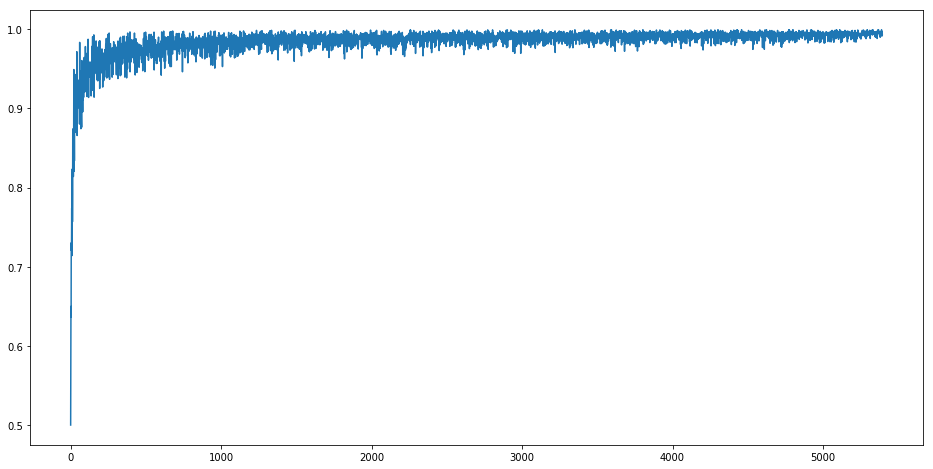

In [18]:
print(betas)
plt.plot(prob)
plt.show()

## Tournament Prediction

In [31]:
tss1 = tss[tss['Season'] == 2017]
ts1 = ts[ts['Season'] == 2017]
print(tss1.shape)
tourn = np.asarray(tss1['Slot'])
teams1 = np.asarray(tss1['StrongSeed'])
teams2 = np.asarray(tss1['WeakSeed'])
rounds = ['Prelims','Round of 64','Round of 32','Sweet Sixteen','Elite Eight','Final Four','Championship']
lt = []
k=0
# print(teams1)
# print(teams2)
for i in range(67):
    team1 = ts1[ts1['Seed'] == teams1[i]]['TeamID']
    team2 = ts1[ts1['Seed'] == teams2[i]]['TeamID']
    team1vals = dt[int(team1) - 1101,:]
    team2vals = dt[int(team2) - 1101,:]
    team1prob = betas[0] + np.sum(betas[1:9]*team1vals)
    team2prob = betas[0] + np.sum(betas[1:9]*team2vals)
    ind = tourn[i]
    t1 = int(team1)
    t2 = int(team2)
    if i in [0,4,36,52,60,64,66]:
        print("")
        print(rounds[k],'\n')
        k+=1
    if (team1prob > team2prob):
        new_num = teams1[i]
        print(teams[teams['TeamID'] == t1].reset_index().loc[0,'TeamName']," beats ",teams[teams['TeamID'] == t2].reset_index().loc[0,'TeamName'])
        lt.append(t1)
    else:
        new_num = teams2[i]
        print(teams[teams['TeamID'] == t2].reset_index().loc[0,'TeamName']," beats ",teams[teams['TeamID'] == t1].reset_index().loc[0,'TeamName'])
        lt.append(t2)
    for j in range(67):
        if (teams1[j] == tourn[i]):
            teams1[j] = new_num
        if (teams2[j] == tourn[i]):
            teams2[j] = new_num
lt = pd.Series(lt).value_counts(normalize=False,sort=True,ascending=False)

(67, 4)

Prelims 

USC  beats  Providence
New Orleans  beats  Mt St Mary's
NC Central  beats  UC Davis
Wake Forest  beats  Kansas St

Round of 64 

Villanova  beats  New Orleans
Duke  beats  Troy
New Mexico St  beats  Baylor
Florida  beats  ETSU
UNC Wilmington  beats  Virginia
SMU  beats  USC
South Carolina  beats  Marquette
Wisconsin  beats  Virginia Tech
Gonzaga  beats  S Dakota St
Arizona  beats  North Dakota
Florida St  beats  FL Gulf Coast
West Virginia  beats  Bucknell
Notre Dame  beats  Princeton
Xavier  beats  Maryland
VA Commonwealth  beats  St Mary's CA
Northwestern  beats  Vanderbilt
Kansas  beats  NC Central
Louisville  beats  Jacksonville St
Oregon  beats  Iona
Purdue  beats  Vermont
Nevada  beats  Iowa St
Rhode Island  beats  Creighton
Oklahoma St  beats  Michigan
Michigan St  beats  Miami FL
North Carolina  beats  TX Southern
Kentucky  beats  N Kentucky
UCLA  beats  Kent
Winthrop  beats  Butler
Minnesota  beats  MTSU
Cincinnati  beats  Wake Forest
Wichita St  beats  Dayt

In [32]:
lt = np.asarray(lt)
print(lt)
for i in lt:
    print(lt[i])

[6 5 4 4 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


## RMSE ~ 1.082